# Yang Visualization Input
## Load the Data
## Set the libraries

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# load the Titanic dataset
import pandas as pd
import numpy as np

#import the data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df = pd.read_csv('C:/Users/taniat470s/Desktop/SMU_course/DS7331/Project/ds_7331_jyrf_eda/PublicSchools2014to2017_YZ.csv') # read in the csv file

## Basic Info

In [2]:
print (df.dtypes)
print (df.info(verbose=True))

vphone_ad              object
street_ad              object
scity_ad               object
szip_ad               float64
category_cd            object
                       ...   
TwoOrMoreFemalePct    float64
TwoOrMoreMalePct      float64
TwoOrMorePct          float64
unit_code               int64
Year                    int64
Length: 259, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9731 entries, 0 to 9730
Data columns (total 259 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   vphone_ad                            object 
 1   street_ad                            object 
 2   scity_ad                             object 
 3   szip_ad                              float64
 4   category_cd                          object 
 5   url_ad                               object 
 6   grade_range_cd                       object 
 7   calendar_type_txt                    object 
 8   sna_pgm_type_cd               

## Data Pre-processing
Replace Column Names which contains space
<br>
Exclude records which has school type equals to 0

In [3]:
#Data Pre-processing

df.columns = [c.replace(' ', '_') for c in df.columns]

df = df[df["school_type_txt"]!="0"]

## Bar Plot of School Category Distribution
Majority propertion of Schools are "Regular School".

C:\Users\taniat470s\Anaconda3\envs\ML7331\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


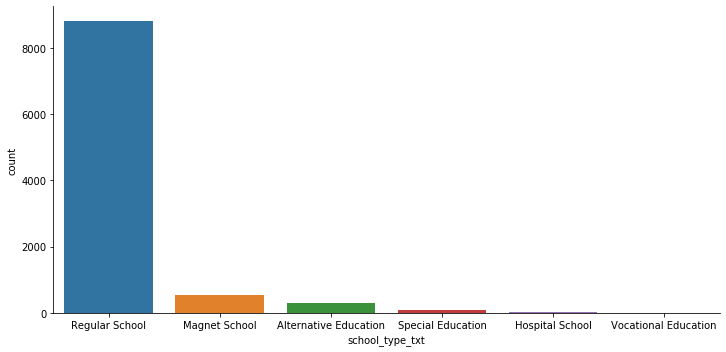

In [4]:
#Distribution of School Category
sns.factorplot("school_type_txt", data=df, aspect=2,
                       kind="count",order = df['school_type_txt'].value_counts().index)

In [5]:
df["school_type_txt"].value_counts()

Regular School           8810
Magnet School             527
Alternative Education     291
Special Education          82
Hospital School            14
Vocational Education        1
Name: school_type_txt, dtype: int64

In [6]:
remap_cat_dict = {
    'Regular School': 'Regular School',
    'Magnet School': 'Magnet School',
    'Alternative Education': 'Other',
    'Special Education': 'Other',
    'Hospital School': 'Other',
    'Vocational Education': 'Other' }


df["school_type_txt"] = df["school_type_txt"].map(remap_cat_dict).astype('category')
df["school_type_txt"].value_counts()

Regular School    8810
Magnet School      527
Other              388
Name: school_type_txt, dtype: int64

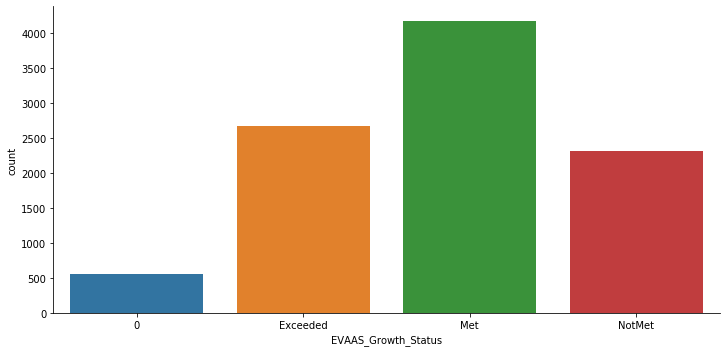

In [7]:
#Distribution of EVAAS Growth Status
sns.factorplot("EVAAS_Growth_Status", data=df, aspect=2,
                       kind="count")

## Data Filtering
Filter out records with SPG_Score equal to 0
<br>
Assign the category "A+NG" to A for SPG Grade

In [8]:
df_SPG = df[df["SPG_Score"]!=0]


#df_SPG[df_SPG['SPG_Grade']=='A+NG'] = 'A'

remap_cat_dict = {
    'C': 'C',
    'B': 'B',
    'D': 'D',
    'F': 'F',
    'A': 'A',
    'A+NG': 'A'}

df_SPG["SPG_Grade"] = df_SPG["SPG_Grade"].map(remap_cat_dict).astype('category')
df_SPG["SPG_Grade"].value_counts()

print (df_SPG.dtypes)

C:\Users\taniat470s\Anaconda3\envs\ML7331\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


C    3972
B    2312
D    1924
A     572
F     429
Name: SPG_Grade, dtype: int64

vphone_ad              object
street_ad              object
scity_ad               object
szip_ad               float64
category_cd            object
                       ...   
TwoOrMoreFemalePct    float64
TwoOrMoreMalePct      float64
TwoOrMorePct          float64
unit_code               int64
Year                    int64
Length: 259, dtype: object


## Bar Plot of SPG Grade Distribution
Biggest propertion of grade "C". A close-to-normal distribution is observed.

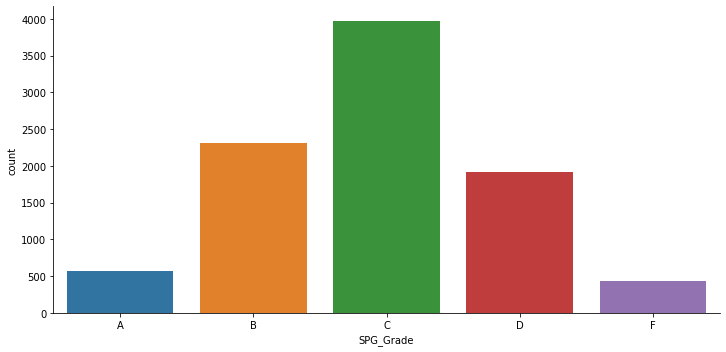

In [9]:
sns.factorplot("SPG_Grade", data=df_SPG, aspect=2,
                       kind="count", order=['A','B','C','D','F'])

<Figure size 1440x1080 with 0 Axes>

([<matplotlib.patches.Wedge at 0x1bfd9f52cc8>,
 [Text(1.0882408268902317, 0.16041166631284948, 'F'),
  Text(0.9716843825837932, 0.5155865210056918, 'A'),
  Text(0.25234515268775104, 1.0706642442498002, 'D'),
  Text(-1.030576149944083, 0.3845943306478025, 'B'),
  Text(0.23551332349845241, -1.0744921937616454, 'C')],
 [Text(0.5935859055764899, 0.08749727253428152, '4.7%'),
  Text(0.5300096632275235, 0.28122901145765, '6.2%'),
  Text(0.1376428105569551, 0.5839986786817091, '20.9%'),
  Text(-0.5621324454240452, 0.20977872580789225, '25.1%'),
  Text(0.12846181281733765, -0.5860866511427156, '43.1%')])

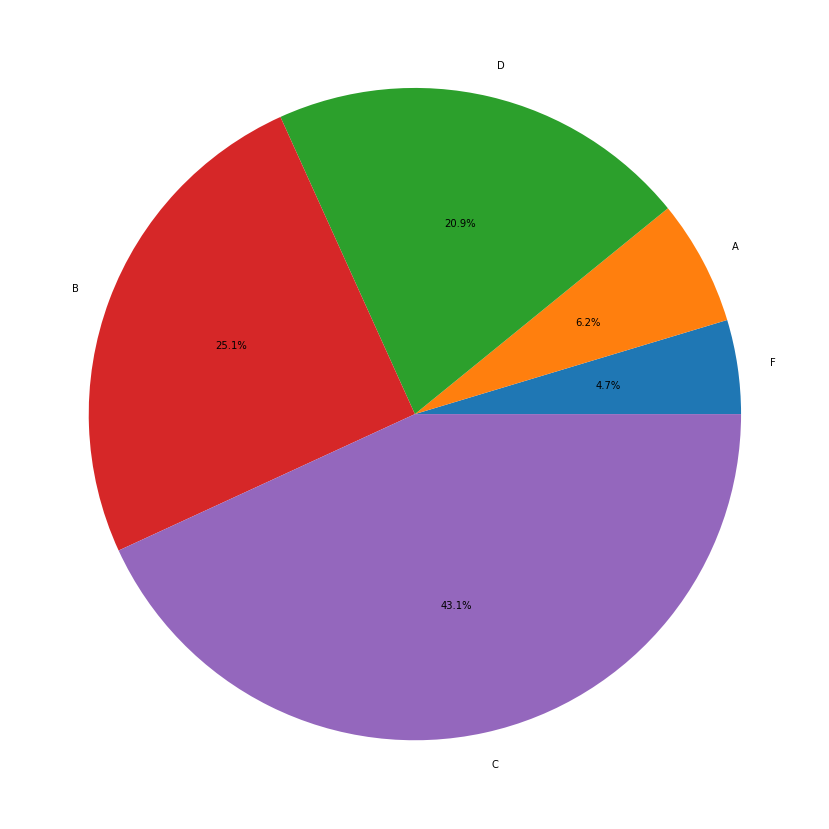

In [10]:
#Pie Plot of SPG Grade Distribution

pie_SPG = df_SPG.groupby('SPG_Grade').agg('count')

plt.figure(1, figsize=(20,15))

#source_labels = pie_sources.vphone_ad.sort_values().index
#source_counts = pie_sources.vphone_ad.sort_values()


SPG_labels = pie_SPG.school_type_txt.sort_values().index
SPG_counts = pie_SPG.school_type_txt.sort_values()

#cmap = plt.get_cmap('Spectral')
#colors = [cmap(i) for i in np.linspace(0, 1, 8)]

#plt.pie(SPG_counts, labels=SPG_labels, autopct='%1.1f%%', colors=colors)
plt.pie(SPG_counts, labels=SPG_labels, autopct='%1.1f%%')



## Added New Feature:
New Variable: 'MinorityOverallPct' is a sum of MinorityMale and MinorityFemale together

In [11]:
df_SPG['MinorityOverallPct'] = df_SPG.MinorityMalePct + df_SPG.MinorityFemalePct

C:\Users\taniat470s\Anaconda3\envs\ML7331\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## A general observation:
<br>
-The lower the grade, the higher the minority overall percentage.
<br>-The lower the grade, the higher the short term suspensions rate.
<br>-The lower the grade, the higher the crime rate.
<br>-The lower the grade, the higher federal expense per pupil.
<br>-The lower the grade, the higher the percentage of teacher with 0 to 3 years of experience.
<br>-The lower the grade, the higher the number of the teacher proficient standard.

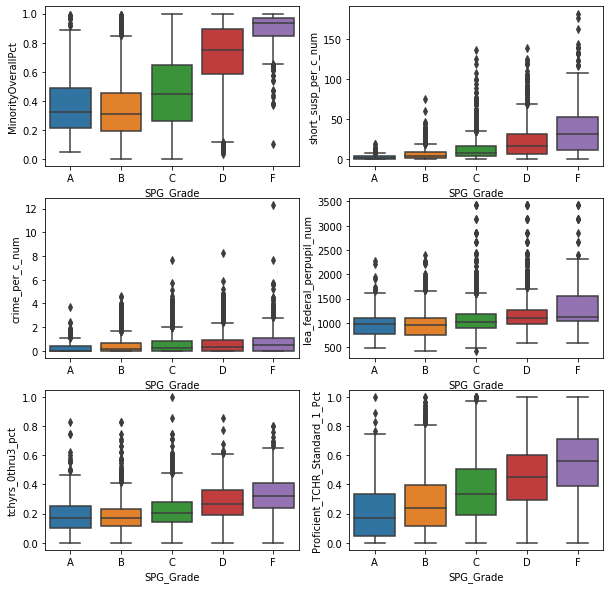

In [12]:
#Let's see the distribution of scores with different variables


f, axes = plt.subplots(3, 2,figsize=(10,10))

    
    
#SPG grade related to white percentage
sns.boxplot(  y="MinorityOverallPct", x= "SPG_Grade", data=df_SPG,  orient='v' , ax=axes[0,0],order=['A','B','C','D','F'])


#SPG grade related to Short term suspensions per 100 students
sns.boxplot(  y="short_susp_per_c_num", x= "SPG_Grade", data=df,  orient='v' , ax=axes[0,1],order=['A','B','C','D','F'])

#SPG grade related to Crime rate
sns.boxplot(  y="crime_per_c_num", x= "SPG_Grade", data=df,  orient='v' , ax=axes[1,0],order=['A','B','C','D','F'])


#SPG grade related to federal funding
sns.boxplot(  y="lea_federal_perpupil_num", x= "SPG_Grade", data=df,  orient='v' , ax=axes[1,1],order=['A','B','C','D','F'])

#SPG grade related to teacher experience
sns.boxplot(  y="tchyrs_0thru3_pct", x= "SPG_Grade", data=df,  orient='v' , ax=axes[2,0],order=['A','B','C','D','F'])

#SPG grade related to teacher effectiveness
sns.boxplot(  y="Proficient_TCHR_Standard_1_Pct", x= "SPG_Grade", data=df,  orient='v' , ax=axes[2,1],order=['A','B','C','D','F'])

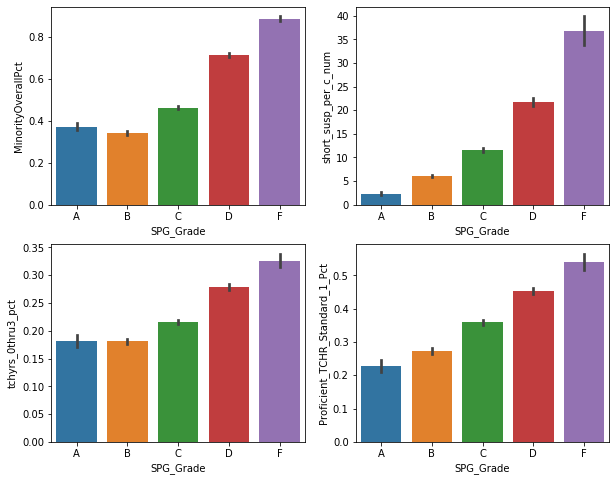

In [13]:
#Let's see the bar plots of scores with different variables


fig, axarr  = plt.subplots(2,2,figsize=(10,8))
sns.barplot(x='SPG_Grade', y='MinorityOverallPct', data=df_SPG, order=['A','B','C','D','F'], ax=axarr[0,0])
sns.barplot(x='SPG_Grade', y='short_susp_per_c_num', data=df_SPG, order=['A','B','C','D','F'], ax=axarr[0,1])
sns.barplot(x='SPG_Grade', y='tchyrs_0thru3_pct', data=df_SPG, order=['A','B','C','D','F'], ax=axarr[1,0])
sns.barplot(x='SPG_Grade', y='Proficient_TCHR_Standard_1_Pct', data=df_SPG, order=['A','B','C','D','F'], ax=axarr[1,1])

## Added New Feature:
New Variable: 'Majority_Minority' is 1 when 'MinorityOverallPct' is larger than 50%. 

This has divide the schools roughly to half/half.

In [14]:
df_SPG['Majority_Minority'] = np.where(df_SPG['MinorityOverallPct']> .5, 1, 0)

C:\Users\taniat470s\Anaconda3\envs\ML7331\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


C:\Users\taniat470s\Anaconda3\envs\ML7331\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


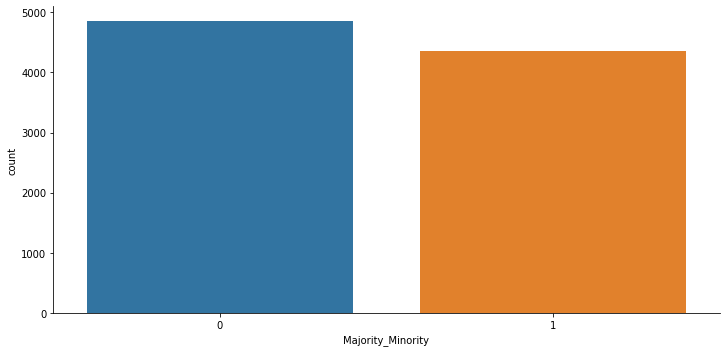

In [15]:
sns.factorplot("Majority_Minority", data=df_SPG, aspect=2,
                       kind="count")

([<matplotlib.patches.Wedge at 0x1bfdacf1e48>,
 [Text(0.09388779128083845, 1.0959858952780397, '1'),
  Text(-0.09388779128083809, -1.0959858952780397, '0')],
 [Text(0.05121152251682096, 0.597810488333476, '47.3%'),
  Text(-0.05121152251682077, -0.597810488333476, '52.7%')])

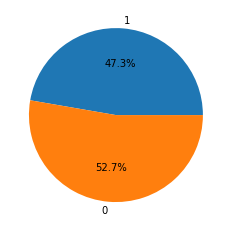

In [16]:
pie_Major = df_SPG.groupby('Majority_Minority').agg('count')

Major_labels = pie_Major.school_type_txt.sort_values().index
Major_counts = pie_Major.school_type_txt.sort_values()

plt.pie(Major_counts, labels=Major_labels, autopct='%1.1f%%')

Observation: Regular school averagely have a different minority propertion compared with magnet school.
    

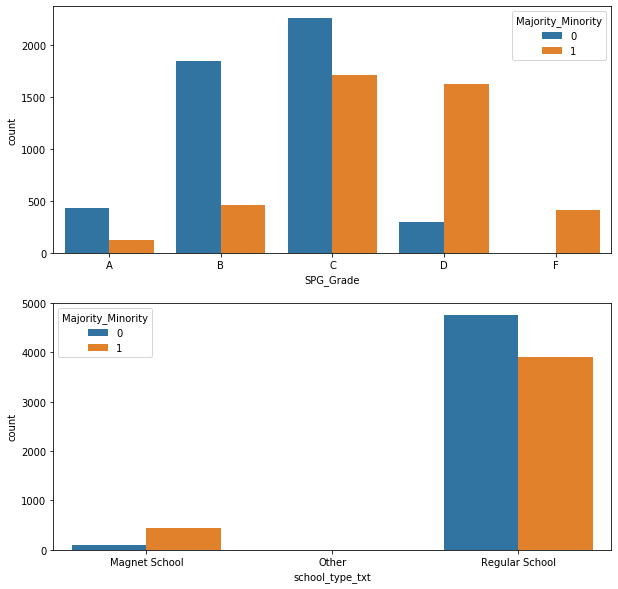

In [17]:
#Comparison of School SPG grades and types with less or more minorities in school

f, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='SPG_Grade', hue='Majority_Minority', data=df_SPG, ax=axis1)
sns.countplot(x='school_type_txt', hue='Majority_Minority', data=df_SPG, ax=axis2)

## A general observation:
<br>
-The lower the grade, the higher the minority overall percentage.
<br>-The lower the grade, the larger variation the short term suspensions rate. No obvious difference between school groups.
<br>-The lower the grade, the larger variation the crime rate.
<br>-Slightly higher federal expense per pupil for minority schools
<br>-Slightly higher the percentage of teacher with 0 to 3 years of experience for minority schools
<br>-Slightly higher the number of the teacher proficient standard for minority schools
<br>-Slightly lower science score for minority schools, with very few minority school has Grade A.

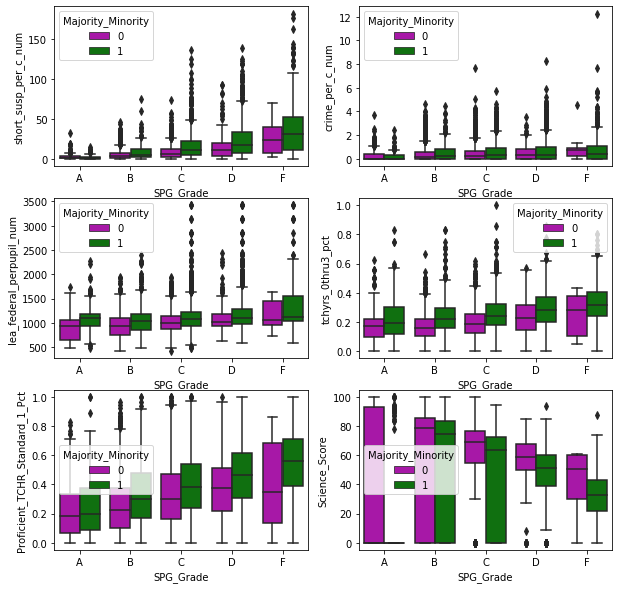

In [18]:
#Comparison of multiple variables with less or more minorities in school

f, axes = plt.subplots(3, 2,figsize=(10,10))

sns.boxplot(x= "SPG_Grade", y="short_susp_per_c_num",
            hue="Majority_Minority", palette=["m", "g"],
            data=df_SPG, ax=axes[0,0],order=['A','B','C','D','F'])


sns.boxplot(x= "SPG_Grade", y="crime_per_c_num",
            hue="Majority_Minority", palette=["m", "g"],
            data=df_SPG, ax=axes[0,1],order=['A','B','C','D','F'])


sns.boxplot(x= "SPG_Grade", y="lea_federal_perpupil_num",
            hue="Majority_Minority", palette=["m", "g"],
            data=df_SPG, ax=axes[1,0],order=['A','B','C','D','F'])


sns.boxplot(x= "SPG_Grade", y="tchyrs_0thru3_pct",
            hue="Majority_Minority", palette=["m", "g"],
            data=df_SPG, ax=axes[1,1],order=['A','B','C','D','F'])


sns.boxplot(x= "SPG_Grade", y="Proficient_TCHR_Standard_1_Pct",
            hue="Majority_Minority", palette=["m", "g"],
            data=df_SPG, ax=axes[2,0],order=['A','B','C','D','F'])


sns.boxplot(x= "SPG_Grade", y="Science_Score",
            hue="Majority_Minority", palette=["m", "g"],
            data=df_SPG, ax=axes[2,1],order=['A','B','C','D','F'])



With a break-up of SPG grade with Majority/Minority on Science score, we can observe:
<br>
-Majority school has a high proportion in B and C.
<br>
-Minority school has a high proportion in C and D.

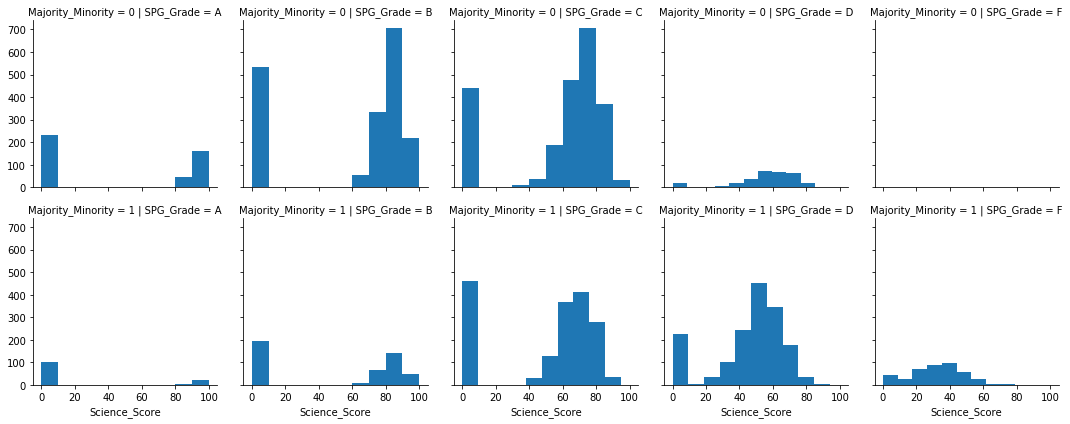

In [19]:
g = sns.FacetGrid(df_SPG, col="SPG_Grade",  row="Majority_Minority", col_order=['A','B','C','D','F'])
g = g.map(plt.hist, "Science_Score")

## Added New Feature:
New Variable: 'SPG_Met' is a remap SPG_Grade to Pass and Fail

In [20]:
#Remap SPG_Grade to Pass and Fail

# remap_cat_dict = {
#     'C': 'Pass',
#     'B': 'Pass',
#     'D': 'Fail',
#     'F': 'Fail',
#     'A': 'Pass'}

remap_cat_dict = {
    'C': 1,
    'B': 1,
    'D': 0,
    'F': 0,
    'A': 1}

df_SPG["SPG_Met"] = df_SPG["SPG_Grade"].map(remap_cat_dict).astype('category')
df_SPG["SPG_Met"].value_counts()


C:\Users\taniat470s\Anaconda3\envs\ML7331\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1    6856
0    2353
Name: SPG_Met, dtype: int64

In [21]:
# the cross tab operator provides an easy way to get these numbers
spg = pd.crosstab([ df_SPG['school_type_txt'],df_SPG['Majority_Minority'] ], 
                       df_SPG.SPG_Met.astype(bool))
print (spg)

SPG_Met                            False  True 
school_type_txt Majority_Minority              
Magnet School   0                      3     87
                1                    163    273
Other           0                      1      1
                1                      5      1
Regular School  0                    304   4459
                1                   1877   2035


In [24]:
Observation: The proportion between Majority and Minority Schools on Grade Pass/Fail is apparantly different.

SyntaxError: invalid syntax (<ipython-input-24-5b525da0bb1c>, line 1)

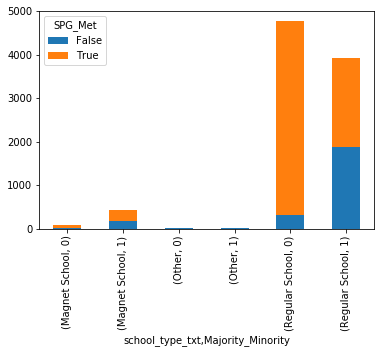

In [22]:
spg.plot(kind='bar', stacked=True)

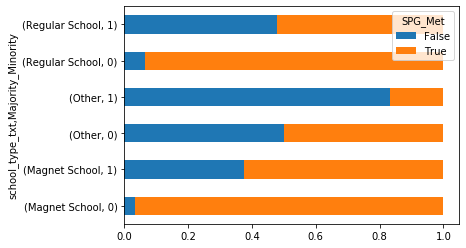

In [23]:
spg_rate = spg.div(spg.sum(1).astype(float),
                             axis=0) # normalize the value

# print survival_rate
spg_rate.plot(kind='barh', 
                   stacked=True)